Q.1
Open the wikipedia page https://en.wikipedia.org/wiki/Saturn
1. Scrap the web and find top 10 nouns from the page


In [7]:
import requests
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag
from nltk.corpus import wordnet


In [3]:
url = 'https://en.wikipedia.org/wiki/Saturn'
headers = {
    'User-Agent': 'Mozilla Firefox'
}

response = requests.get(url=url, headers=headers)
response

<Response [200]>

In [4]:
from bs4 import BeautifulSoup

In [5]:
soup = BeautifulSoup(response.text, 'html.parser')

text = soup.get_text()

In [10]:
import string

In [15]:
tokens = word_tokenize(text)
tokens = [token for token in tokens if token.isalnum() or token in string.punctuation]

text = ' '.join(tokens)

In [16]:
sent_tokens = sent_tokenize(text)

In [ ]:
tokens = [token.lower() for token in tokens if token.isalpha()]

tags = pos_tag(tokens)
nouns = set()

for word, tag in tags:
    if tag.startswith('N'):
        nouns.add(word)



In [20]:
from nltk import FreqDist


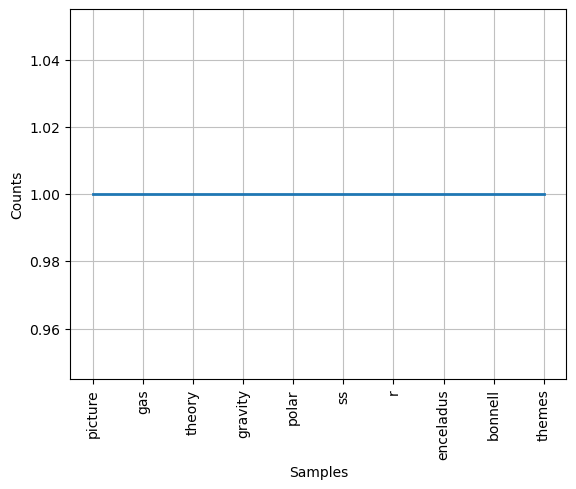

In [30]:

freq = FreqDist(nouns)
freq.plot(10);

In [32]:
print('top 10 nouns: ')
freq.most_common(10)

top 10 nouns: 


[('picture', 1),
 ('gas', 1),
 ('theory', 1),
 ('gravity', 1),
 ('polar', 1),
 ('ss', 1),
 ('r', 1),
 ('enceladus', 1),
 ('bonnell', 1),
 ('themes', 1)]

2. Print all the unique verbs in their root form.

In [34]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

In [35]:
verbs = set()
for word, tag in tags:
    if tag.startswith('V'):
        verbs.add(wnl.lemmatize(word, pos='v'))

verbs

{'absolute',
 'accumulate',
 'achieve',
 'acquire',
 'add',
 'advance',
 'agree',
 'al',
 'albiorix',
 'alexander',
 'allow',
 'ammonia',
 'angle',
 'announce',
 'antares',
 'appear',
 'apply',
 'approach',
 'april',
 'archive',
 'articletalk',
 'ascend',
 'assign',
 'associate',
 'assume',
 'asteroid',
 'astronomers',
 'astronomy',
 'astrophysics',
 'au',
 'audio',
 'august',
 'b',
 'bagby',
 'banyumasanбашҡортсабеларускаябеларуская',
 'bar',
 'base',
 'batch',
 'bbc',
 'be',
 'become',
 'begin',
 'believe',
 'belt',
 'billions',
 'binoculars',
 'bland',
 'blink',
 'brainerd',
 'briefly',
 'bright',
 'bring',
 'bulge',
 'bulletin',
 'cain',
 'call',
 'cambridge',
 'capture',
 'carry',
 'casey',
 'cassiel',
 'cassini',
 'cause',
 'celebrate',
 'cere',
 'change',
 'charge',
 'charikloan',
 'christianize',
 'claim',
 'classify',
 'cloud',
 'colonize',
 'coma',
 'come',
 'compare',
 'complete',
 'compose',
 'comprise',
 'compute',
 'condense',
 'conduct',
 'confine',
 'confirm',
 'conside


3. Extract all the <DT><JJ><NN> phrases from the article.

In [38]:
from nltk import RegexpParser

In [44]:
grammar = """
  NP: {<DT>?<JJ>*<NN.*>+}   # Noun phrase: (Optional Determiner) (zero or more Adjectives) (one or more Nouns)
  VP: {<VB.*><NP|PP|CLAUSE>*} # Verb phrase: Verb (optional NP, PP, or clause)
  PP: {<IN><NP>+}           # Prepositional phrase: Preposition (one or more Nouns)
  ADJP: {<RB.*>*<JJ>+}      # Adjective phrase: (Optional Adverb) (one or more Adjectives)
  ADVP: {<RB.*>+}           # Adverb phrase: one or more Adverbs
"""
parser = RegexpParser(grammar=grammar)

In [45]:
tree = parser.parse(tags)

In [46]:
tree

In [49]:
# Iterate through every level of the parse tree
for subtree in tree.subtrees():
    # 'S' is the default top level for the whole sentence, so we skip it
    if subtree.label() != 'S':
        phrase_type = subtree.label()
        
        # Get the list of (word, pos_tag) tuples in this phrase
        phrase_leaves = subtree.leaves()
        
        # Check if the list of leaves has more than one item (is multi-word)
        if len(phrase_leaves) > 1:
            phrase_words = " ".join([word for word, pos in phrase_leaves])
            print(f"{phrase_type} detected: '{phrase_words}'")

VP detected: 'content main menu main menu move'
NP detected: 'main menu'
NP detected: 'main menu move'
VP detected: 'sidebar hide navigation main pagecontentscurrent eventsrandom'
NP detected: 'hide navigation'
NP detected: 'main pagecontentscurrent eventsrandom'
VP detected: 'contribute helplearn'
VP detected: 'editcommunity portalrecent changesupload filespecial pages'
NP detected: 'portalrecent changesupload'
NP detected: 'filespecial pages'
VP detected: 'search search appearance donate create account log'
NP detected: 'search appearance donate create account log'
PP detected: 'in personal tools'
NP detected: 'personal tools'
VP detected: 'donate create account log'
NP detected: 'create account log'
PP detected: 'in contents'
NP detected: 'top name'
NP detected: 'physical characteristics'
VP detected: 'toggle physical characteristics'
NP detected: 'physical characteristics'
VP detected: 'subsection internal structure'
NP detected: 'internal structure'
NP detected: 'cloud layers'
NP 


4. Summarize the text using TextRank Algorithm

In [51]:
from sumy.summarizers.text_rank import TextRankSummarizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer

In [52]:
text_parser = PlaintextParser.from_string(text, Tokenizer('english'))

In [ ]:
text_ranker = TextRankSummarizer()
summary = text_ranker(text_parser.document, sentences_count=5)

In [55]:
for s in summary:
    print(s)

Saturn - Wikipedia Jump to content Main menu Main menu move to sidebar hide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us Contribute HelpLearn to editCommunity portalRecent changesUpload fileSpecial pages Search Search Appearance Donate Create account Log in Personal tools Donate Create account Log in Contents move to sidebar hide ( Top ) 1 Name and symbol 2 Physical characteristics Toggle Physical characteristics subsection Internal structure Atmosphere Cloud layers Hexagonal cloud patterns Magnetosphere 3 Orbit and rotation 4 Natural satellites 5 Planetary rings 6 History of observation and exploration Toggle History of observation and exploration subsection observation Telescopic observations Spaceflight missions Pioneer 11 flyby Voyager flybys spacecraft Possible future missions 7 Observation 8 In fiction 9 See also 10 Notes 11 References 12 Further reading 13 External links Toggle the table of contents Saturn 235 languages / BanyumasanБашҡортсаБ


5. Summarize the text using extractive summarization

In [56]:
from sumy.summarizers.lsa import LsaSummarizer

In [57]:
text_parser = PlaintextParser.from_string(text, Tokenizer('english'))

In [58]:
lsa_summary = LsaSummarizer()
summary = lsa_summary(text_parser.document, sentences_count=5)

In [59]:
for s in summary:
    print(s)

Saturn - Wikipedia Jump to content Main menu Main menu move to sidebar hide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us Contribute HelpLearn to editCommunity portalRecent changesUpload fileSpecial pages Search Search Appearance Donate Create account Log in Personal tools Donate Create account Log in Contents move to sidebar hide ( Top ) 1 Name and symbol 2 Physical characteristics Toggle Physical characteristics subsection Internal structure Atmosphere Cloud layers Hexagonal cloud patterns Magnetosphere 3 Orbit and rotation 4 Natural satellites 5 Planetary rings 6 History of observation and exploration Toggle History of observation and exploration subsection observation Telescopic observations Spaceflight missions Pioneer 11 flyby Voyager flybys spacecraft Possible future missions 7 Observation 8 In fiction 9 See also 10 Notes 11 References 12 Further reading 13 External links Toggle the table of contents Saturn 235 languages / BanyumasanБашҡортсаБ